In [11]:
import pandas as pd
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
from bayesian_pep import *

In [32]:
Aus_ref_lat = -25.34
Aus_ref_lon = 131.03

Aus_poles = pd.read_csv('./data/Australia_poles/Australia_Cenozoic_poles.csv')
#Aus_poles = Aus_poles[0:7]

for n in range(0,len(Aus_poles)):
    Aus_poles['Paleolat'][n] = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat, 
                                                   Aus_poles['PLon'][n], Aus_poles['PLat'][n])
    Aus_poles['Age_error'][n] = Aus_poles['AgeNominal'][n] - Aus_poles['AgeUpper'][n]

In [33]:
Aus_poles

,PoleName,Unnamed: 1,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,...,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,Paleolat,Age_error
0,Holocene lake sediments,sedimentary,-38.2,143.0,89.4,144.6,1.5,168.5,57.0,NaN,...,0.005,0.0,0.01,Radiocarbon,Idnurm1985a,NaN,uniform,NaN,-24.756669,-0.005
1,Plio-Pleistocene mean,NaN,NaN,NaN,87.7,353.0,3.2,41.1,48.0,NaN,...,2.000,1.0,3.00,NaN,NaN,NaN,uniform,NaN,-27.039912,-1.000
2,Glenample Fm./Port Campbell Lst.,sedimentary,NaN,NaN,77.2,303.5,3.9,40.7,30.0,NaN,...,13.000,9.0,17.00,chronostratigraphy inferred from biostratigrap...,Dickinson2002,NaN,uniform,NaN,-38.014319,-4.000
3,leucitite lavas,igneous,NaN,NaN,80.2,275.4,8.6,20.5,15.0,NaN,...,16.000,15.0,17.00,Ar-Ar dates with range assigned by Hansma2018,NaN,NaN,uniform,NaN,-33.146262,-1.000
4,Main Range Volcano,igneous,NaN,NaN,76.6,271.6,6.1,23.5,25.0,NaN,...,23.450,20.2,26.70,3 Ar-Ar dates with uniform distribution extend...,Knesel2008a,NaN,uniform,NaN,-35.318194,-3.250
5,Tweed Volcano,igneous,NaN,NaN,77.4,306.9,5.4,15.4,48.0,NaN,...,23.900,23.1,24.70,6 Ar-Ar dates,Knesel2008a,NaN,uniform,NaN,-37.902815,-0.800
6,Pt. Addis Limestone,sedimentary,NaN,NaN,68.5,299.4,4.8,NaN,NaN,NaN,...,25.100,22.4,27.80,NaN,NaN,NaN,uniform,NaN,-46.273372,-2.700
7,Springsure Volcano,igneous,-24.2,148.2,70.5,300.6,9.7,13.7,18.0,NaN,...,28.100,27.8,28.40,Ar-Ar Sanidine,Cohen2013a,0.3,gaussian,NaN,-44.438602,-0.300
8,Peak Range,igneous,-22.5,147.8,64.6,291.8,8.8,10.1,29.0,NaN,...,29.650,28.2,31.10,Ar-Ar dates of 30.7 +/- 0.4; 30.3 +/- 0.4; 30....,Cohen2013a,NaN,uniform,NaN,-48.820635,-1.450
9,Hillsborough Volcano,igneous,-21.2,148.9,67.1,301.4,7.1,32.2,14.0,NaN,...,33.600,33.1,34.10,Ar-Ar k-spar date,Cohen2013a,0.5,gaussian,NaN,-47.815426,-0.500


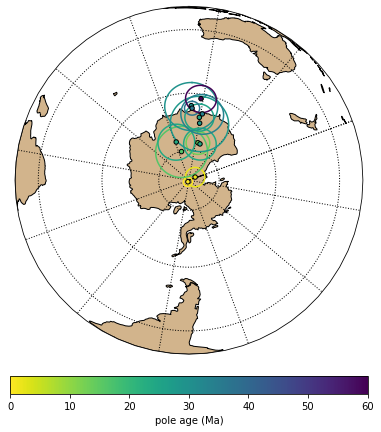

In [34]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r')


In [35]:
Seton_path = np.loadtxt('./data/Australia_poles/australia_apw_seton_2012.txt')

In [36]:
Seton_path_sparse = Seton_path[::2]

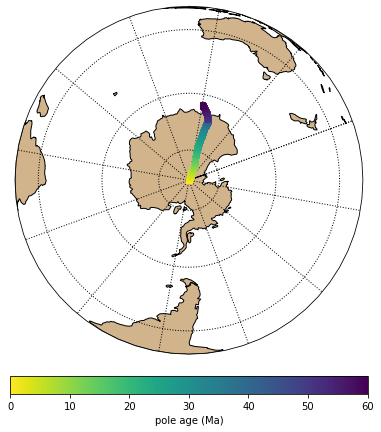

In [37]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='viridis_r',
                          markersize=30,marker='s',edgecolor=None)

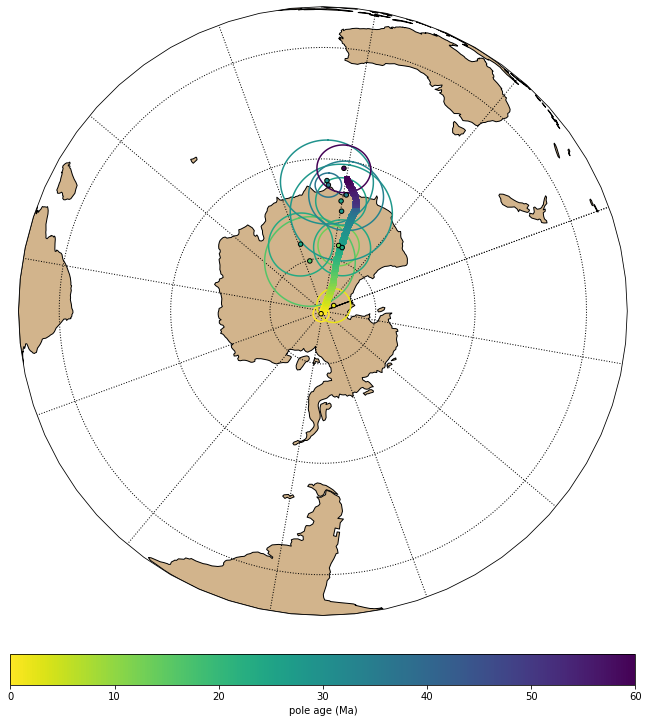

In [52]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90, figsize=(14, 14))

ipmag.plot_poles_colorbar(map_axis,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='viridis_r',
                          markersize=30,marker='s',edgecolor=None)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r',colorbar=False)

In [38]:
Seton_paleolat = []

for n in range(0,len(Seton_path)):
    paleolat = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat,Seton_path[:,1][n],Seton_path[:,2][n])
    Seton_paleolat.append(-paleolat)

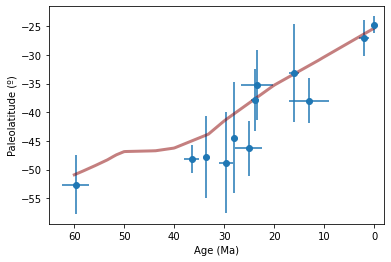

In [39]:
plt.errorbar(Aus_poles['AgeNominal'],Aus_poles['Paleolat'],yerr=Aus_poles['A95'],xerr=Aus_poles['Age_error'],fmt='o')
plt.plot(Seton_path[:,0],Seton_paleolat,color='darkred',linewidth=3,alpha=0.5)
plt.xlim(65,-2)
plt.xlabel('Age (Ma)')
plt.ylabel('Paleolatitude (º)')
plt.show()

Text(0, 0.5, 'Pole latitude (º)')

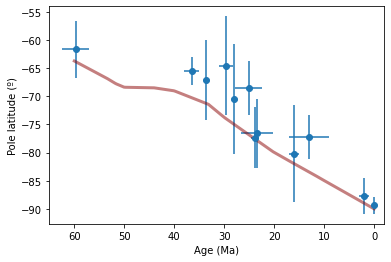

In [40]:
plt.errorbar(Aus_poles['AgeNominal'],-Aus_poles['PLat'],yerr=Aus_poles['A95'],xerr=Aus_poles['Age_error'],fmt='o')
plt.plot(Seton_path[:,0],Seton_path[:,2],color='darkred',linewidth=3,alpha=0.5)
plt.xlim(65,-2)
plt.xlabel('Age (Ma)')
plt.ylabel('Pole latitude (º)')

In [41]:
Aus_poles

,PoleName,Unnamed: 1,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,...,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,Paleolat,Age_error
0,Holocene lake sediments,sedimentary,-38.2,143.0,89.4,144.6,1.5,168.5,57.0,NaN,...,0.005,0.0,0.01,Radiocarbon,Idnurm1985a,NaN,uniform,NaN,-24.756669,-0.005
1,Plio-Pleistocene mean,NaN,NaN,NaN,87.7,353.0,3.2,41.1,48.0,NaN,...,2.000,1.0,3.00,NaN,NaN,NaN,uniform,NaN,-27.039912,-1.000
2,Glenample Fm./Port Campbell Lst.,sedimentary,NaN,NaN,77.2,303.5,3.9,40.7,30.0,NaN,...,13.000,9.0,17.00,chronostratigraphy inferred from biostratigrap...,Dickinson2002,NaN,uniform,NaN,-38.014319,-4.000
3,leucitite lavas,igneous,NaN,NaN,80.2,275.4,8.6,20.5,15.0,NaN,...,16.000,15.0,17.00,Ar-Ar dates with range assigned by Hansma2018,NaN,NaN,uniform,NaN,-33.146262,-1.000
4,Main Range Volcano,igneous,NaN,NaN,76.6,271.6,6.1,23.5,25.0,NaN,...,23.450,20.2,26.70,3 Ar-Ar dates with uniform distribution extend...,Knesel2008a,NaN,uniform,NaN,-35.318194,-3.250
5,Tweed Volcano,igneous,NaN,NaN,77.4,306.9,5.4,15.4,48.0,NaN,...,23.900,23.1,24.70,6 Ar-Ar dates,Knesel2008a,NaN,uniform,NaN,-37.902815,-0.800
6,Pt. Addis Limestone,sedimentary,NaN,NaN,68.5,299.4,4.8,NaN,NaN,NaN,...,25.100,22.4,27.80,NaN,NaN,NaN,uniform,NaN,-46.273372,-2.700
7,Springsure Volcano,igneous,-24.2,148.2,70.5,300.6,9.7,13.7,18.0,NaN,...,28.100,27.8,28.40,Ar-Ar Sanidine,Cohen2013a,0.3,gaussian,NaN,-44.438602,-0.300
8,Peak Range,igneous,-22.5,147.8,64.6,291.8,8.8,10.1,29.0,NaN,...,29.650,28.2,31.10,Ar-Ar dates of 30.7 +/- 0.4; 30.3 +/- 0.4; 30....,Cohen2013a,NaN,uniform,NaN,-48.820635,-1.450
9,Hillsborough Volcano,igneous,-21.2,148.9,67.1,301.4,7.1,32.2,14.0,NaN,...,33.600,33.1,34.10,Ar-Ar k-spar date,Cohen2013a,0.5,gaussian,NaN,-47.815426,-0.500


In [42]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    euler_2 = Watson_Girdle('euler_2', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_2 = pm.Uniform('rate_2', 0, 4) 
    
    start_index = Aus_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Aus_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Aus_poles['AgeNominal'].max()))
    
    start_lon_lat = [Aus_poles['PLon'].tolist()[start_index], Aus_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    switchpoint = pm.Uniform('switchpoint', Aus_poles['AgeNominal'].min(), Aus_poles['AgeNominal'].max())
    
    for i in range(Aus_poles.shape[0]):
        
        if Aus_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Aus_poles['AgeLower'][i], Aus_poles['AgeUpper'][i])

        else: 
            age = pm.Normal('t'+str(i), mu=Aus_poles['AgeNominal'][i], sigma = Aus_poles['Gaussian_2sigma'][i])
            mu = Aus_poles['AgeNominal'][i]
            sigma = Aus_poles['Gaussian_2sigma'][i]

        print('pole '+str(i)+' age: ',Aus_poles['AgeNominal'][i])
        
        lon_lat = pole_position_2e(start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[i]), 
                            observed=[Aus_poles['PLon'].tolist()[i], Aus_poles['PLat'].tolist()[i]])
        
        
    trace_2e = pm.sample(1000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

starting pole age is:  59.75
starting pole lon/lat: [298.4, 61.7] starting pole k:  753.5563244905807
pole 0 age:  0.005
pole 1 age:  2.0
pole 2 age:  13.0
pole 3 age:  16.0
pole 4 age:  23.45
pole 5 age:  23.9
pole 6 age:  25.1
pole 7 age:  28.1
pole 8 age:  29.65
pole 9 age:  33.6
pole 10 age:  36.5
pole 11 age:  59.75


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [t11]
>Metropolis: [t10]
>Metropolis: [t9]
>Metropolis: [t8]
>Metropolis: [t7]
>Metropolis: [t6]
>Metropolis: [t5]
>Metropolis: [t4]
>Metropolis: [t3]
>Metropolis: [t2]
>Metropolis: [t1]
>Metropolis: [t0]
>Metropolis: [switchpoint]
>Metropolis: [start_pole]
>Metropolis: [start_pole_age]
>Metropolis: [rate_2]
>Metropolis: [euler_2]
>Metropolis: [rate_1]
>Metropolis: [euler_1]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 104 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


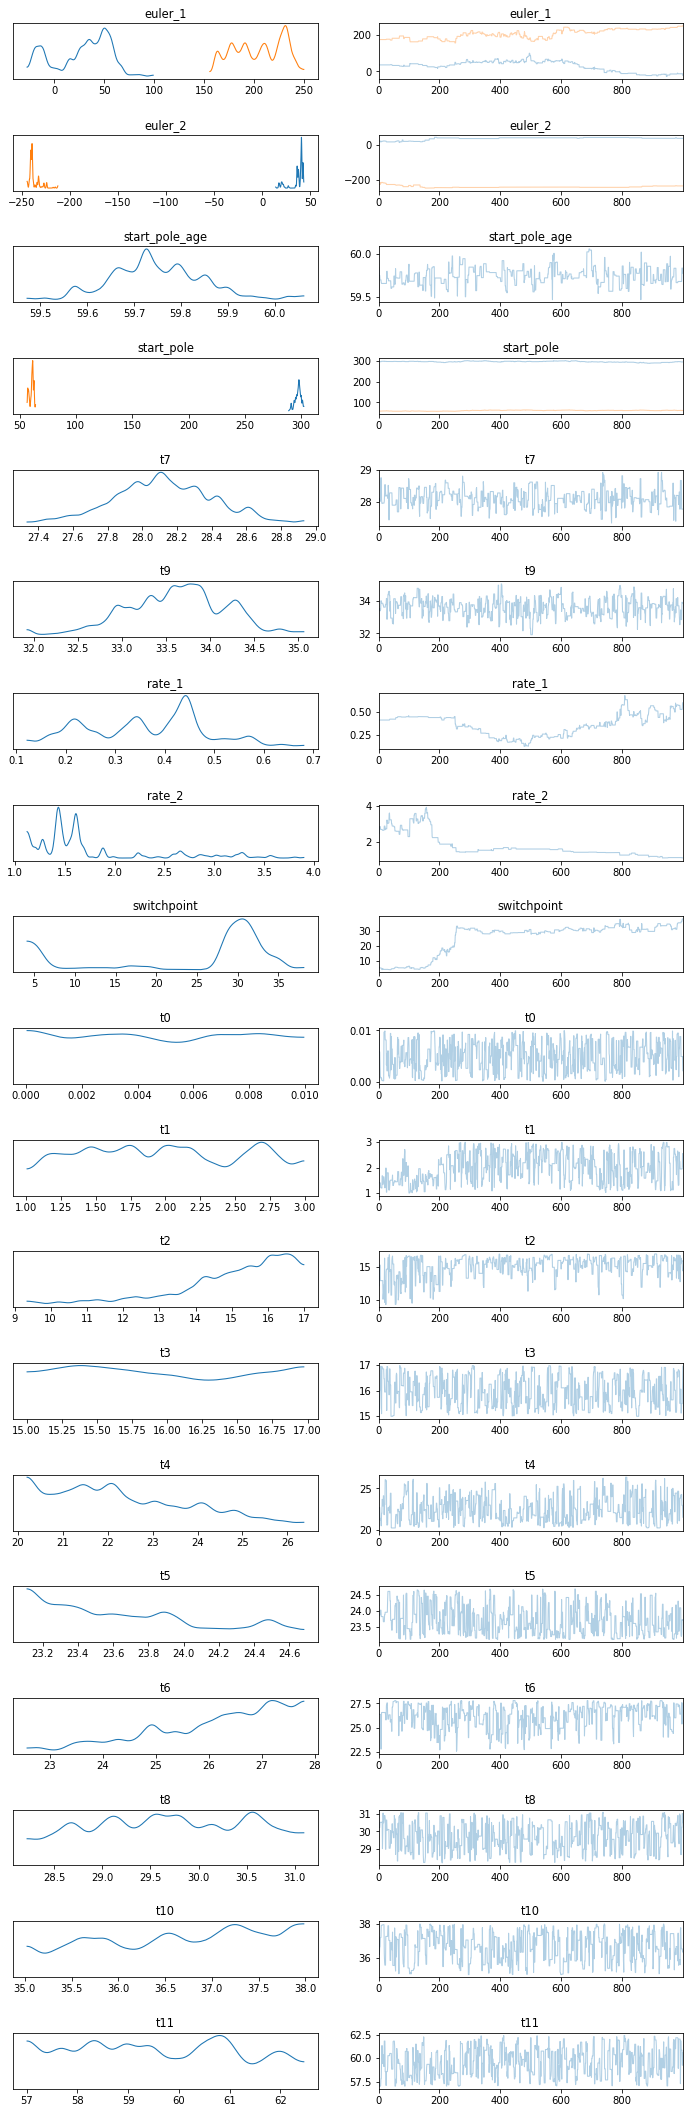

In [45]:
axes = pm.traceplot(trace_2e, compact=1)
plt.subplots_adjust(hspace = 1 )

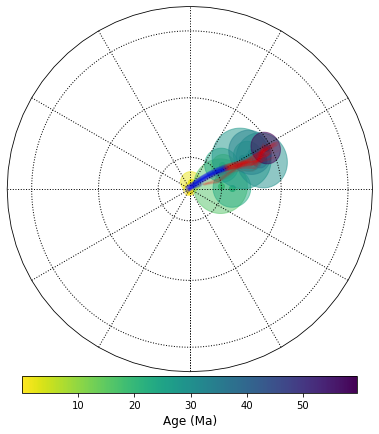

In [54]:
plot_trace_2e(trace_2e, Aus_poles[['PLon', 'PLat']].to_numpy(), Aus_poles['A95'], Aus_poles['AgeNominal'].tolist(),
              central_lon=180, central_lat=90, num_paths_to_plot=100, 
                  savefig = False);

In [64]:
plot_trace_2e??

Signature:
plot_trace_2e(
    trace,
    lon_lats,
    A95s,
    ages,
    central_lon=30.0,
    central_lat=30.0,
    num_paths_to_plot=500,
    savefig=True,
    figname='2_Euler_inversion_test.pdf',
    path_resolution=100,
    **kwargs,
)
Docstring: <no docstring>
Source:   
def plot_trace_2e( trace, lon_lats, A95s, ages, central_lon = 30., central_lat = 30., num_paths_to_plot = 500, 
                  savefig = True, figname = '2_Euler_inversion_test.pdf', path_resolution=100, **kwargs):
    def pole_position( start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age ):

        euler_pole_1 = EulerPole( euler_1[0], euler_1[1], rate_1)
        euler_pole_2 = EulerPole( euler_2[0], euler_2[1], rate_2)
        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        if age >= switchpoint:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-age))
        else:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-

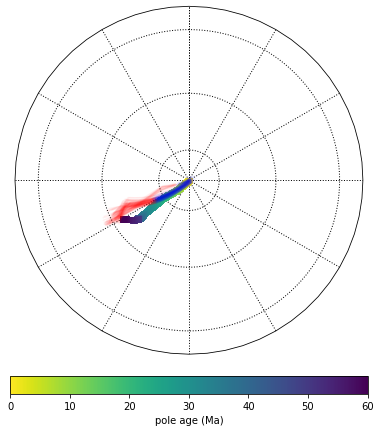

In [69]:
trace = trace_2e
num_paths_to_plot = 100
central_lon = 0
central_lat = 90
A95s = Aus_poles['A95']
ages = Aus_poles['AgeNominal'].tolist()
path_resolution=100

def pole_position( start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age ):

        euler_pole_1 = EulerPole( euler_1[0], euler_1[1], rate_1)
        euler_pole_2 = EulerPole( euler_2[0], euler_2[1], rate_2)
        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        if age >= switchpoint:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-age))
        else:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-switchpoint))
            start_pole.rotate( euler_pole_2, euler_pole_2.rate*(switchpoint-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat

euler_1_directions = trace.euler_1
rates_1 = trace.rate_1

euler_2_directions = trace.euler_2
rates_2 = trace.rate_2

start_directions = trace.start_pole
start_ages = trace.start_pole_age
switchpoints = trace.switchpoint

interval = max([1,int(len(rates_1)/num_paths_to_plot)])

#ax = plt.axes(projection = ccrs.Orthographic(0.,30.))
ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=0, grid_lines = 1)

ipmag.plot_poles_colorbar(ax,Seton_path_sparse[:,1]+180,
                          -Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='viridis_r',
                          markersize=30,marker='s',edgecolor=None)

plot_distributions(ax, euler_1_directions[:,0], euler_1_directions[:,1], cmap = 'Blues')
plot_distributions(ax, euler_2_directions[:,0], euler_2_directions[:,1], cmap = 'Reds')

age_list = np.linspace(ages[0], ages[-1], path_resolution)
pathlons = np.empty_like(age_list)
pathlats = np.empty_like(age_list)

for start, e1, r1, e2, r2, switch, start_age \
             in zip(start_directions[::interval], 
                    euler_1_directions[::interval], rates_1[::interval],
                    euler_2_directions[::interval], rates_2[::interval],
                    switchpoints[::interval], start_ages[::interval]):
    for i,a in enumerate(age_list):
        lon_lat = pole_position( start, e1, r1, e2, r2, switch, start_age, a)
        pathlons[i] = lon_lat[0]
        pathlats[i] = lon_lat[1]

    ax.plot(pathlons[int(switch):],pathlats[int(switch):],color='r', transform=ccrs.Geodetic(), alpha=0.05,zorder=1000)
    ax.plot(pathlons[:int(switch)],pathlats[:int(switch)],color='b', transform=ccrs.Geodetic(), alpha=0.05,zorder=1000)



In [66]:
Seton_path_sparse

array([[  0.               ,   0.               , -90.               ],
       [  0.603015075376884, 129.36357468216067 , -89.69790543286896 ],
       [  1.206030150753769, 129.39320815186673 , -89.3957567754729  ],
       [  1.809045226130653, 129.42293303117077 , -89.0935552487197  ],
       [  2.412060301507537, 129.4527507717043  , -88.79130207912749 ],
       [  3.015075376884422, 129.48266282997764 , -88.48899849900758 ],
       [  3.618090452261306, 129.512670667423   , -88.1866457466545  ],
       [  4.221105527638191, 129.54277575047732 , -87.88424506618009 ],
       [  4.824120603015075, 129.5729795506259  , -87.58179770776755 ],
       [  5.427135678391959, 129.6032835444692  , -87.27930492764341 ],
       [  6.030150753768844, 129.63368921379197 , -86.9767679880805  ],
       [  6.633165829145728, 129.66419804559965 , -86.67418815769216 ],
       [  7.236180904522612, 129.6948115322102  , -86.37156671117611 ],
       [  7.839195979899497, 129.72553117128967 , -86.0689049296